In [1]:
!pip install cityscapesScripts

In [ ]:
!jupyter nbconvert --execute lab_06_cityscapes.ipynb --inplace

In [ ]:
!unzip /content/drive/MyDrive/Tutor/cityscape/leftImg8bit_trainvaltest.zip

In [ ]:
!unzip /content/drive/MyDrive/Tutor/cityscape/Dataset/gtFine_trainvaltest.zip

#Analysis

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import Cityscapes
import os
import numpy as np
import torch.nn.functional as F
import torch
import torch.nn as nn
from collections import OrderedDict
import torch.optim as optim
import cv2
import os
import yaml
import pandas as pd
from collections import Counter
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import glob
import pickle
# from cityscapesScripts.helpers.labels import ToTensorNoNorm

In [ ]:

import numpy as np
from PIL import Image
from torchvision.datasets import Cityscapes
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transform to convert PIL image to NumPy array
to_numpy = transforms.ToPILImage()

# Specify root directory where Cityscapes dataset is stored
root = '/content'

# Load Cityscapes dataset without any transformation
train_dataset = Cityscapes(root=root, split='train', mode='fine', target_type='semantic')
val_dataset = Cityscapes(root=root, split='val', mode='fine', target_type='semantic')
test_dataset = Cityscapes(root=root, split='test', mode='fine', target_type='semantic')



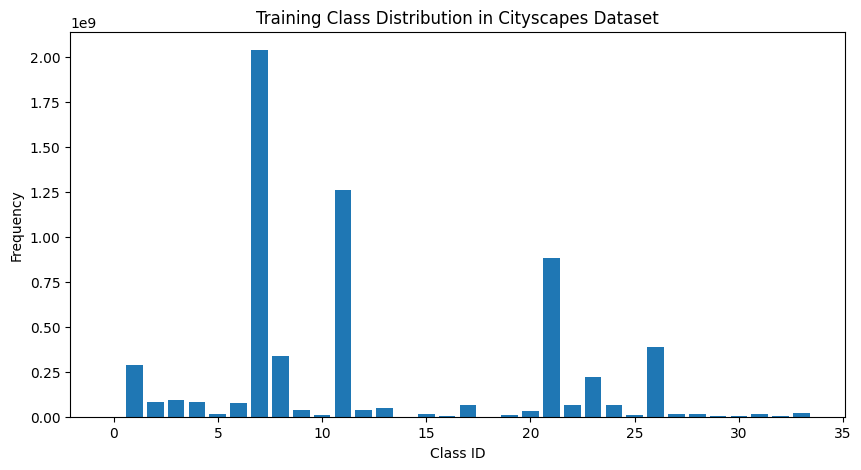

Class 1: 286002726 occurrences
Class 3: 94111150 occurrences
Class 4: 83752079 occurrences
Class 5: 17818704 occurrences
Class 7: 2036416525 occurrences
Class 8: 336090793 occurrences
Class 11: 1260636120 occurrences
Class 12: 36199498 occurrences
Class 13: 48454166 occurrences
Class 17: 67789506 occurrences
Class 19: 11477088 occurrences
Class 20: 30448193 occurrences
Class 21: 879783988 occurrences
Class 23: 221979646 occurrences
Class 24: 67326424 occurrences
Class 25: 7463162 occurrences
Class 26: 386328286 occurrences
Class 28: 12990290 occurrences
Class 32: 5449152 occurrences
Class 33: 22861233 occurrences
Class 6: 75629728 occurrences
Class 22: 63949536 occurrences
Class 31: 12863955 occurrences
Class 27: 14772328 occurrences
Class 0: 704950 occurrences
Class 9: 39065130 occurrences
Class 30: 1300575 occurrences
Class 18: 499872 occurrences
Class 14: 547202 occurrences
Class 15: 17860177 occurrences
Class 2: 81359604 occurrences
Class 29: 2493375 occurrences
Class 10: 11239214 

In [ ]:
class_counts = {}

# Iterate over the dataset to count class occurrences
for img, target in train_dataset:
    target_np = np.array(target)  # Convert target tensor to numpy array
    unique_classes, class_counts_img = np.unique(target_np, return_counts=True)
    for cls, count in zip(unique_classes, class_counts_img):
        if cls not in class_counts:
            class_counts[cls] = 0
        class_counts[cls] += count

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Training Class Distribution in Cityscapes Dataset')
plt.show()

# Print class counts
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} occurrences")

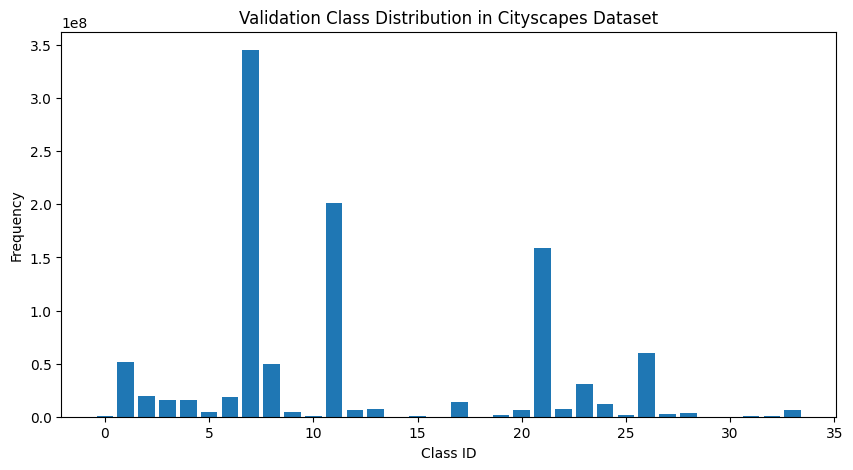

Class 1: 51330054 occurrences
Class 2: 19784166 occurrences
Class 3: 15817000 occurrences
Class 4: 15650152 occurrences
Class 6: 18676902 occurrences
Class 7: 345264442 occurrences
Class 8: 49568652 occurrences
Class 11: 201005428 occurrences
Class 12: 6718315 occurrences
Class 13: 7521741 occurrences
Class 17: 13565658 occurrences
Class 19: 1808393 occurrences
Class 20: 6098373 occurrences
Class 21: 158868008 occurrences
Class 24: 11913424 occurrences
Class 25: 1975596 occurrences
Class 26: 59731217 occurrences
Class 33: 6504475 occurrences
Class 5: 4449872 occurrences
Class 22: 7625026 occurrences
Class 28: 3563120 occurrences
Class 23: 30765347 occurrences
Class 31: 1031648 occurrences
Class 32: 729415 occurrences
Class 9: 4151398 occurrences
Class 10: 638410 occurrences
Class 0: 375854 occurrences
Class 15: 312193 occurrences
Class 18: 78175 occurrences
Class 27: 2760211 occurrences
Class 29: 53411 occurrences
Class 30: 201086 occurrences
Class 14: 38838 occurrences


In [ ]:
class_counts = {}

# Iterate over the dataset to count class occurrences
for img, target in val_dataset:
    target_np = np.array(target)  # Convert target tensor to numpy array
    unique_classes, class_counts_img = np.unique(target_np, return_counts=True)
    for cls, count in zip(unique_classes, class_counts_img):
        if cls not in class_counts:
            class_counts[cls] = 0
        class_counts[cls] += count

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Validation Class Distribution in Cityscapes Dataset')
plt.show()

# Print class counts
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} occurrences")

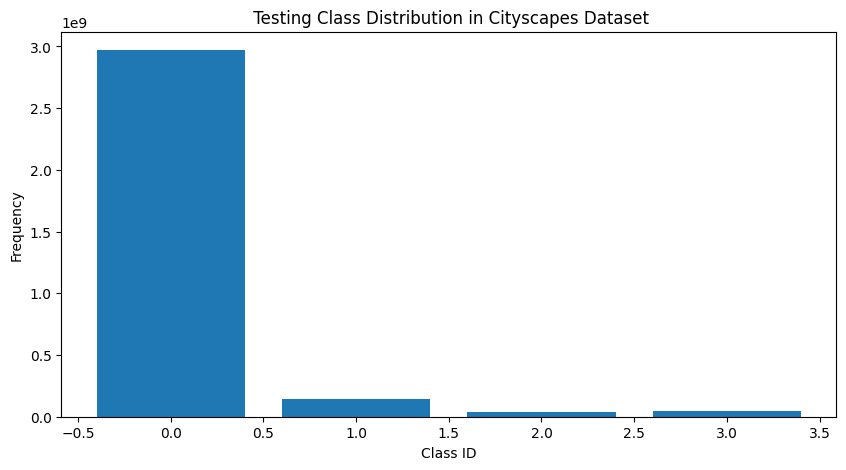

Class 0: 2971132460 occurrences
Class 1: 143289548 occurrences
Class 3: 48241850 occurrences
Class 2: 35492942 occurrences


In [ ]:
class_counts = {}

# Iterate over the dataset to count class occurrences
for img, target in test_dataset:
    target_np = np.array(target)  # Convert target tensor to numpy array
    unique_classes, class_counts_img = np.unique(target_np, return_counts=True)
    for cls, count in zip(unique_classes, class_counts_img):
        if cls not in class_counts:
            class_counts[cls] = 0
        class_counts[cls] += count

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title(' Testing Class Distribution in Cityscapes Dataset')
plt.show()

# Print class counts
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} occurrences")

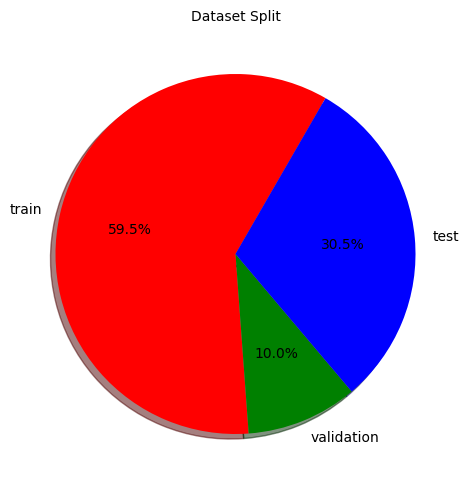

In [ ]:
# bankrupt=Counter(df_corrupt['bankrupt'])  #Taking bankrupt column
# freq=[bankrupt[key] for key in bankrupt.keys()] #Calculating frequency of each class
#Plotting a pie graph
freq=[2975,500,1525]
plt.pie(
    freq,
    labels = ['train','validation','test'],
    shadow = True,
    colors = ["Red", "Green",'blue'],
    startangle=60,
    autopct='%1.1f%%'
)
plt.tight_layout()
plt.title("Dataset Split", fontsize=10)
plt.show()

#DataLoader

In [ ]:
#Creating a custom data loader

class CustomDataset(Dataset):
    def __init__(self,split_type):

        transform = transforms.Compose([transforms.Resize((256, 512))])
        root = '/content'
        self.data = Cityscapes(root=root, split=split_type, mode='fine', target_type='semantic', transform=transform,target_transform=transform)


    def __len__(self):
        return len(self.data)


    def __getitem__(self, idx):
        image_path, label_path = self.data[idx]
        img = np.array(image_path)
        #Moving axis
        img= np.moveaxis(img, 2, 0)
        #Replacing nan with number
        img= np.nan_to_num(img)
        #Performing normalization
        img= (img-np.min(img))/(np.max(img)-np.min(img))

        label = np.array(label_path)
        label=np.expand_dims(label, axis=0)

        img_tensor = torch.from_numpy(img)
        label_tensor = torch.from_numpy(label)

        return img_tensor, label_tensor

dataset = CustomDataset("train")
print("No. of Training Samples: ",dataset.__len__())
trainloader = DataLoader(dataset, batch_size=4, shuffle=False)

dataset = CustomDataset("val")
print("No. of validation Samples: ",dataset.__len__())
valloader = DataLoader(dataset, batch_size=4, shuffle=False)

dataset = CustomDataset("test")
print("No. of Testing Samples: ",dataset.__len__())
testloader = DataLoader(dataset, batch_size=4, shuffle=False)





No. of Training Samples:  2975
No. of validation Samples:  500
No. of Testing Samples:  1525


#Model : Small CrackUnet

In [ ]:
#Importing LIbraries
import numpy as np
import torch.nn.functional as F
import torch
import torch.nn as nn
from collections import OrderedDict
import torch.optim as optim
import cv2
import os
import pandas as pd
from collections import Counter
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import glob
import pickle
import warnings
warnings.filterwarnings("ignore")
os.system('CUDA_LAUNCH_BLOCKING=1')

use_cuda = torch.cuda.is_available()
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
device_ids = [i for i in range(torch.cuda.device_count())]
device = 'cuda' if use_cuda else 'cpu'
torch.backends.cudnn.benchmark = True



#Crack-Unet Architecture

class Small_Crack_UNet(nn.Module):

    def __init__(self, in_channels=3, out_channels=34, init_features=64):
        super(Small_Crack_UNet, self).__init__()



        features = init_features
        self.encoder1 = Small_Crack_UNet.crack_unet_block(in_channels, features, name="enc1")          #1024,64
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder2 = Small_Crack_UNet.crack_unet_block(features, features * 2, name="enc2")         #512,128
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder3 = Small_Crack_UNet.crack_unet_block(features * 2, features * 4, name="enc3")    #256,256
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder4 = Small_Crack_UNet.crack_unet_block(features * 4, features * 8, name="enc4")    #128,512
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bottleneck = Small_Crack_UNet.crack_unet_block(features * 4, features * 8, name="bottleneck") #64,1024

        self.upconv4 = nn.ConvTranspose2d(features * 16, features * 8, kernel_size=2, stride=2)  #128, 512
        self.decoder4 = Small_Crack_UNet.crack_unet_block((features * 8) * 2, features * 8, name="dec4")            #128,512

        self.upconv3 = nn.ConvTranspose2d(features * 8, features * 4, kernel_size=2, stride=2 )   #256, 256
        self.decoder3 = Small_Crack_UNet.crack_unet_block((features * 4) * 2, features * 4, name="dec3")            #256, 256

        self.upconv2 = nn.ConvTranspose2d(features * 4, features * 2, kernel_size=2, stride=2 )  #512,128
        self.decoder2 = Small_Crack_UNet.crack_unet_block((features * 2) * 2, features * 2, name="dec2")           #512,128

        self.upconv1 = nn.ConvTranspose2d(features * 2, features, kernel_size=2, stride=2)    #1024,64
        self.decoder1 = Small_Crack_UNet.crack_unet_block(features * 2, features, name="dec1")                  #1024,64

        self.conv = nn.Conv2d(in_channels=features, out_channels=out_channels, kernel_size=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        # enc4 = self.encoder4(self.pool3(enc3))

        bottleneck = self.bottleneck(self.pool4(enc3))

        # dec4 = self.upconv4(bottleneck)
        # dec4 = torch.cat((dec4, enc4), dim=1)
        # dec4 = self.decoder4(dec4)

        # dec3 = self.upconv3(dec4)
        dec3 = self.upconv3(bottleneck)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)

        return F.sigmoid(self.conv(dec1))


    def crack_unet_block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (name + "conv1", nn.Conv2d(in_channels=in_channels,out_channels=features,kernel_size=3,padding=1,bias=False,),),
                    (name + "norm1", nn.BatchNorm2d(num_features=features)),
                    (name + "relu1", nn.ReLU(inplace=True)),

                    (name + "conv2", nn.Conv2d(in_channels=features,out_channels=features,kernel_size=3,padding=1,bias=False,),),
                    (name + "norm2", nn.BatchNorm2d(num_features=features)),
                    (name + "relu2", nn.ReLU(inplace=True)),


                ]
            )
        )


#Model : CrackUnet

In [ ]:
#Importing LIbraries
import numpy as np
import torch.nn.functional as F
import torch
import torch.nn as nn
from collections import OrderedDict
import torch.optim as optim
import cv2
import os
import pandas as pd
from collections import Counter
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import glob
import pickle
import warnings
warnings.filterwarnings("ignore")
os.system('CUDA_LAUNCH_BLOCKING=1')

use_cuda = torch.cuda.is_available()
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
device_ids = [i for i in range(torch.cuda.device_count())]
device = 'cuda' if use_cuda else 'cpu'
torch.backends.cudnn.benchmark = True



#Crack-Unet Architecture

class Crack_UNet(nn.Module):

    def __init__(self, in_channels=3, out_channels=34, init_features=64):
        super(Crack_UNet, self).__init__()



        features = init_features
        self.encoder1 = Crack_UNet.crack_unet_block(in_channels, features, name="enc1")          #1024,64
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder2 = Crack_UNet.crack_unet_block(features, features * 2, name="enc2")         #512,128
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder3 = Crack_UNet.crack_unet_block(features * 2, features * 4, name="enc3")    #256,256
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder4 = Crack_UNet.crack_unet_block(features * 4, features * 8, name="enc4")    #128,512
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bottleneck = Crack_UNet.crack_unet_block(features * 8, features * 16, name="bottleneck") #64,1024

        self.upconv4 = nn.ConvTranspose2d(features * 16, features * 8, kernel_size=2, stride=2)  #128, 512
        self.decoder4 = Crack_UNet.crack_unet_block((features * 8) * 2, features * 8, name="dec4")            #128,512

        self.upconv3 = nn.ConvTranspose2d(features * 8, features * 4, kernel_size=2, stride=2 )   #256, 256
        self.decoder3 = Crack_UNet.crack_unet_block((features * 4) * 2, features * 4, name="dec3")            #256, 256

        self.upconv2 = nn.ConvTranspose2d(features * 4, features * 2, kernel_size=2, stride=2 )  #512,128
        self.decoder2 = Crack_UNet.crack_unet_block((features * 2) * 2, features * 2, name="dec2")           #512,128

        self.upconv1 = nn.ConvTranspose2d(features * 2, features, kernel_size=2, stride=2)    #1024,64
        self.decoder1 = Crack_UNet.crack_unet_block(features * 2, features, name="dec1")                  #1024,64

        self.conv = nn.Conv2d(in_channels=features, out_channels=out_channels, kernel_size=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))

        bottleneck = self.bottleneck(self.pool4(enc4))

        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)

        return F.sigmoid(self.conv(dec1))


    def crack_unet_block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (name + "conv1", nn.Conv2d(in_channels=in_channels,out_channels=features,kernel_size=3,padding=1,bias=False,),),
                    (name + "norm1", nn.BatchNorm2d(num_features=features)),
                    (name + "relu1", nn.ReLU(inplace=True)),

                    (name + "conv2", nn.Conv2d(in_channels=features,out_channels=features,kernel_size=3,padding=1,bias=False,),),
                    (name + "norm2", nn.BatchNorm2d(num_features=features)),
                    (name + "relu2", nn.ReLU(inplace=True)),

                    (name + "conv3", nn.Conv2d(in_channels=features,out_channels=features,kernel_size=3,padding=1,bias=False,),),
                    (name + "norm3", nn.BatchNorm2d(num_features=features)),
                    (name + "relu3", nn.ReLU(inplace=True)),

                    # (name + "conv4", nn.Conv2d(in_channels=features,out_channels=features,kernel_size=3,padding=1,bias=False,),),
                    # (name + "relu4", nn.ReLU(inplace=True)),


                ]
            )
        )


#Model : Initialization

In [ ]:
use_cuda = torch.cuda.is_available()
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
device_ids = [i for i in range(torch.cuda.device_count())]
device = 'cuda' if use_cuda else 'cpu'
torch.backends.cudnn.benchmark = True

In [ ]:
def initialise_model(model,optimizer ):
    # Checkpointing
    # checkpoints = os.path.join(self.direc,"Problem")
    # best_checkpoints = os.path.join(self.direc,"Best_weights")

    #If checkpoints doesnot exist, Creating a folder for checkpoints and best checkpoints
    # if not os.path.exists(checkpoints):
    #     os.makedirs(checkpoints)
    #     os.makedirs(best_checkpoints)
    # checkpoint_file = os.path.join(checkpoints, "checkpoints.pt")
    # best_checkpoint_file = os.path.join(best_checkpoints, "checkpoints.pt")

    # Initialising Network

    model.to(device)

    # class_weight = torch.tensor([10],dtype=torch.float32).to(device) #Weights for class 1 labels
    optimizer: optim.Adam = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-8) #Adam optimizer
    # loss_criteria = nn.BCEWithLogitsLoss(pos_weight=class_weight)
    # loss_criteria = torch.nn.BCELoss()
    # loss_criteria = nn.MSELoss()

    print("Initialised Network, Optimizer and Loss")
    # print(f"Number of Parameters in Network:{count_parameters(network)}")

    train_losses, test_losses,train_accuracies,test_accuracies =[],[],[],[]
    best_score=0

    # Load checkpoints if exist
    if os.path.exists(checkpoint_file):
        print("Loading from Previous Checkpoint...")
        checkpoint = torch.load(checkpoint_file)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        model.train()

        file1 = open(direc+'Train_acc.pkl', 'rb')
        train_accuracies = pickle.load(file1)

        file2 = open(direc+'Test_acc.pkl', 'rb')
        test_accuracies = pickle.load(file2)

        file3 = open(direc+'Train_loss.pkl', 'rb')
        train_losses = pickle.load(file3)

        file4 = open(direc+'Test_loss.pkl', 'rb')
        test_losses = pickle.load(file4)

        file5 = open(direc+'Best_score.pkl', 'rb')
        best_score = pickle.load(file5)


    else:
        print("No previous checkpoints exist, initialising network from start...")

    return model, optimizer, train_losses, test_losses,train_accuracies,test_accuracies,best_score

#Training

In [ ]:
model=Crack_UNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-8)

# Train the model
num_epochs = 100
train_accuracies=[]
test_accuracies = []
train_losses = []
test_losses = []
best_score = 0
direc= '/content/drive/MyDrive/Tutor/cityscape/'
checkpoint_file ='/content/drive/MyDrive/Tutor/cityscape/ckpt.pth'
best_checkpoint_file ='/content/drive/MyDrive/Tutor/cityscape/best_ckpt.pth'

model, optimizer, train_losses, test_losses,train_accuracies,test_accuracies,best_score = initialise_model(model,optimizer )
print("Best Score:",best_score)
for epoch in range(39,num_epochs):
    model.train()
    correct = 0
    total = 0
    test_correct = 0
    test_total = 0

    for images, targets in trainloader:
        # print(images.shape)
        targets = targets[:,0,:,:]
        # print(targets.shape)
        images = images.to(torch.float32).to(device)
        targets = targets.to(torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        # outputs = outputs.to(torch.float32)
        # print(outputs.shape)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)*targets.size(1)*targets.size(2)
        correct += (predicted == targets).sum().item()
        # break
    accuracy = 100 * correct / total
    train_accuracies.append(accuracy)
    train_losses.append(loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {accuracy:.4f}")

    for images, targets in valloader:
        # print(images.shape)
        targets = targets[:,0,:,:]
        # print(targets.shape)
        images = images.to(torch.float32).to(device)
        targets = targets.to(torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        # outputs = outputs.to(torch.float32)
        # print(outputs.shape)
        loss = criterion(outputs, targets)
        # loss.backward()
        # optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        test_total += targets.size(0)*targets.size(1)*targets.size(2)
        test_correct += (predicted == targets).sum().item()
        # break
    accuracy = 100 * test_correct / test_total
    test_accuracies.append(accuracy)
    test_losses.append(loss.item())
    print(f"Loss: {loss.item():.4f}, Validation Accuracy: {accuracy:.4f}")
    print("______________________________________________________________")

    if best_score < accuracy :
      best_score = accuracy
      torch.save({
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              }, best_checkpoint_file)
      with open(direc+'Best_score.pkl', 'wb') as f:
            pickle.dump(best_score, f)


    if epoch % 5 == 0:
          torch.save({
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              }, checkpoint_file)

          with open(direc+'Train_acc.pkl', 'wb') as f:
            pickle.dump(train_accuracies, f)

          with open(direc+'Test_acc.pkl', 'wb') as f:
              pickle.dump(test_accuracies, f)

          with open(direc+'Train_loss.pkl', 'wb') as f:
              pickle.dump(train_losses, f)

          with open(direc+'Test_loss.pkl', 'wb') as f:
              pickle.dump(test_losses, f)

Initialised Network, Optimizer and Loss
Loading from Previous Checkpoint...
Best Score: 82.91097564697266
Epoch [40/100], Loss: 2.6680, Train Accuracy: 84.0926
Loss: 2.6922, Validation Accuracy: 82.1966
______________________________________________________________
Epoch [41/100], Loss: 2.6670, Train Accuracy: 84.5600
Loss: 2.6915, Validation Accuracy: 82.5384
______________________________________________________________
Epoch [42/100], Loss: 2.6680, Train Accuracy: 84.6681
Loss: 2.6938, Validation Accuracy: 82.5343
______________________________________________________________
Epoch [43/100], Loss: 2.6648, Train Accuracy: 85.0565
Loss: 2.6940, Validation Accuracy: 82.5815
______________________________________________________________
Epoch [44/100], Loss: 2.6586, Train Accuracy: 85.3304
Loss: 2.6903, Validation Accuracy: 82.8660
______________________________________________________________
Epoch [45/100], Loss: 2.6613, Train Accuracy: 85.4790
Loss: 2.6922, Validation Accuracy: 82.71

#Post Analysis

#Cracknet

In [ ]:
direc= '/content/drive/MyDrive/Tutor/cityscape/'
file1 = open(direc+'Train_acc.pkl', 'rb')
train_accuracies = pickle.load(file1)

file2 = open(direc+'Test_acc.pkl', 'rb')
test_accuracies = pickle.load(file2)

file3 = open(direc+'Train_loss.pkl', 'rb')
train_losses = pickle.load(file3)

file4 = open(direc+'Test_loss.pkl', 'rb')
test_losses = pickle.load(file4)

file5 = open(direc+'Best_score.pkl', 'rb')
best_score = pickle.load(file5)

In [ ]:
print("Best Validation Accuracy is : ",best_score)

Best Validation Accuracy is :  83.9559112548828


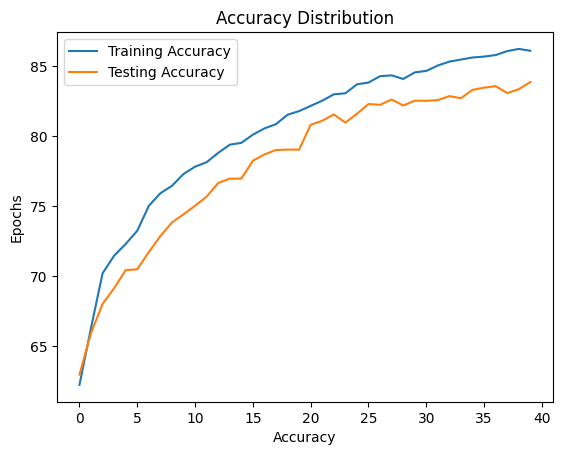

In [ ]:

plt.plot(train_accuracies,label = "Training Accuracy")
plt.plot(test_accuracies,label = "Testing Accuracy")

plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.title('Accuracy Distribution')
plt.legend()
plt.show()

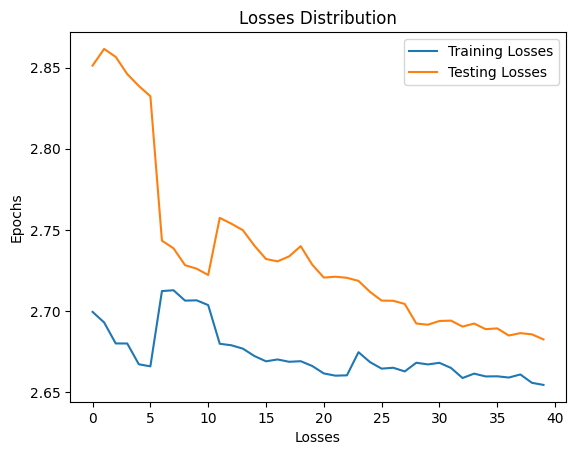

In [ ]:
plt.plot(train_losses,label = "Training Losses")
plt.plot(test_losses,label = "Testing Losses")

plt.xlabel('Losses')
plt.ylabel('Epochs')
plt.title('Losses Distribution')
plt.legend()
plt.show()

#Small Crack Unet


In [ ]:
direc= '/content/drive/MyDrive/Tutor/cityscape/Unet_small/'
file1 = open(direc+'Train_acc.pkl', 'rb')
train_accuracies = pickle.load(file1)

file2 = open(direc+'Test_acc.pkl', 'rb')
test_accuracies = pickle.load(file2)

file3 = open(direc+'Train_loss.pkl', 'rb')
train_losses = pickle.load(file3)

file4 = open(direc+'Test_loss.pkl', 'rb')
test_losses = pickle.load(file4)

file5 = open(direc+'Best_score.pkl', 'rb')
best_score = pickle.load(file5)

In [ ]:
print("Best Validation Accuracy is : ",best_score)

Best Validation Accuracy is :  78.27886352539062


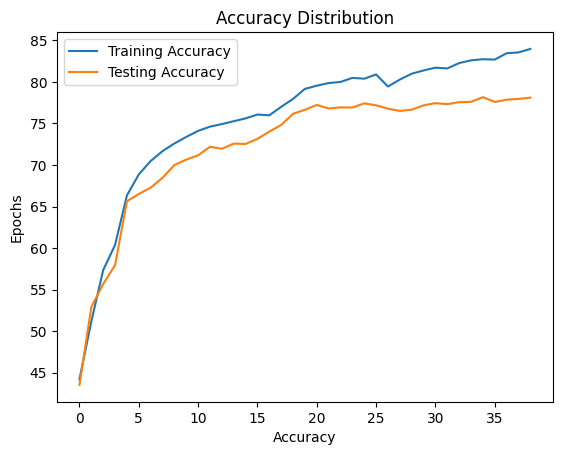

In [ ]:

plt.plot(train_accuracies,label = "Training Accuracy")
plt.plot(test_accuracies,label = "Testing Accuracy")

plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.title('Accuracy Distribution')
plt.legend()
plt.show()

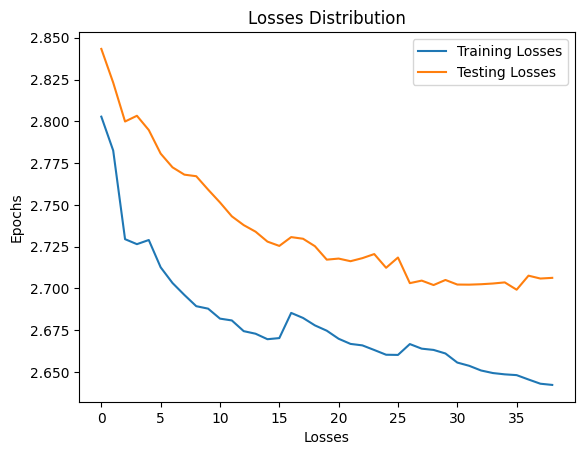

In [ ]:
plt.plot(train_losses,label = "Training Losses")
plt.plot(test_losses,label = "Testing Losses")

plt.xlabel('Losses')
plt.ylabel('Epochs')
plt.title('Losses Distribution')
plt.legend()
plt.show()

We can run the above code by running each cell of the collab notebook and we can make sure to change root path where data is stored. Also, we have to change directory path, checkpoints and best checpoints path where we want to save accuracies and model weights.